In [2]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from scipy.stats.mstats import gmean
import scipy.stats as scs

1. Generate a list of 100 integers containing values between 90 and 130 and store it in a variable 'int_list'. After generating the list, find the following:

i. Write a python function to calculate the mean of the given list of numbers. Create a function to find the median of a list of numbers.

ii. Develop a program to compute the mode of a list of integers.

iii. Implement a function to calculatr the weighted mean of a list of values and also their corresponding weight.

iv. Write a python function to calculate the geometric mean of a list of positive numbers.

v. Create a function to calculate the hermonic mean of a list of values.

vi. Build a function to determine the midrange of a list of values(average of the min and max).

vii. Implement a python program to find the trimmed mean of a list, excluding a certain percentage of outliers.

In [4]:
int_list = np.random.randint(90, 130, (1,100)).tolist()[0]

In [6]:
def mean_median(x):
    print(f"Mean of the integers in the list: {np.mean(int_list)}")
    print(f"Median of the integers in the list: {np.median(int_list)}")
mean_median(int_list)

Mean of the integers in the list: 110.22
Median of the integers in the list: 111.0


In [40]:
print(f"Mode of the numbers in the list: {statistics.mode(int_list)}")

Mode of the numbers in the list: 114


In [29]:

def weighted_mean(x):
    x_table = dict(collections.Counter(x))
    x_var = list(x_table.keys())
    x_freq = list(x_table.values())
    return np.average(x_var, weights= x_freq)
weighted_mean(int_list)

110.22

In [37]:

def geometric_mean(x):
    return gmean(x)
geometric_mean(int_list)

109.62923934896313

In [41]:
def harmonic_mean(x):
    return statistics.harmonic_mean(x)
harmonic_mean(int_list)

109.03587451360465

In [44]:
def midrange(x):
    return (max(x) + min(x)) / 2
midrange(int_list)

110.0

In [50]:
q1 = np.percentile(int_list, 25)
q3 = np.percentile(int_list, 75)
iqr = q3 - q1
lf = np.median(int_list) - 1.5 * iqr
uf = np.median(int_list) + 1.5 * iqr
int_list_trimmed = [x for x in int_list if x > lf and x < uf]

In [53]:
def trimmed_mean(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lf = np.median(x) - 1.5 * iqr
    uf = np.median(x) + 1.5 * iqr
    x_trimmed = [i for i in x if i > lf and i < uf]
    return np.mean(x_trimmed)
trimmed_mean(int_list)

110.22

2. Generate a list of 500 integers containing values between 200 and 300 and store it in the variable 'int_list2'. After generating the list, find the following:

i. Compare the given list of visualization for the given data:

    a. Frequency and Gaussian Distribution.

    b. Frequency smoothened KDE plot.
    
    c. Gaussian distribution and smoothened KDE plot.

ii. Write a python function to calculate the range of given list of numbers.

iii. Create a program to find the variance and standard deviation of a list of numbers.

iv. Implement a function to compute the inter quartile range(IQR) of a list of values.

v. Build a program to calculate the coefficient of variation for a dataset.

vi. Write a python function to find out the mean absolute daviation(MAD) of a list of numbers.

vii. Write a program to calculate the quartile daviation of a list of values.

viii. Implement a function to find out the range-based coefficient of dispersion of a dataset.

In [4]:
int_list2 = np.random.randint(200, 300, (1, 500)).tolist()[0]

In [5]:
il2_mean = np.mean(int_list2)
il2_std = np.std(int_list2)
il2_normalized = np.random.normal(il2_mean, il2_std, 500)

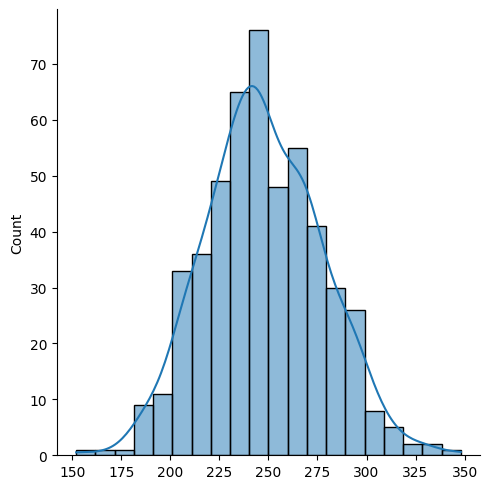

In [21]:
sns.displot(il2_normalized, kde= True)

<Axes: ylabel='Density'>

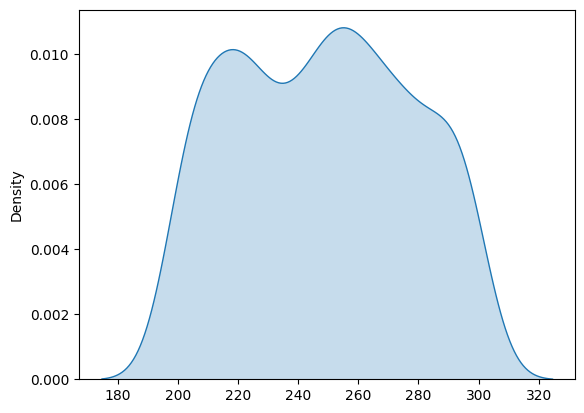

In [17]:
sns.kdeplot(int_list2, fill=True)

<Axes: ylabel='Density'>

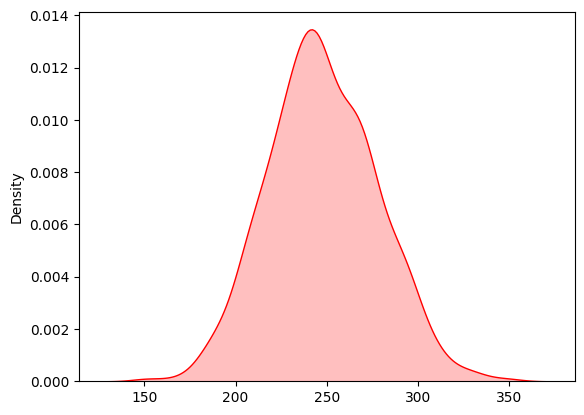

In [18]:
sns.kdeplot(il2_normalized, fill=True, color='r')

In [25]:
def list_range(x):
    r = max(x) - min(x)
    return f"Range of the list is {r}"
list_range(int_list2)

'Range of the list is 99'

In [24]:
il2_std = np.std(int_list2)
il2_var = np.var(int_list2)
print("Standard Daviation: ", il2_std)
print("Variance: ", il2_var)

Standard Daviation:  29.423929037434824
Variance:  865.7676000000001


In [26]:
def iqr(x):
    r = np.percentile(x, 75) - np.percentile(x, 25)
    return f"Inter Quartile Range: {r}"
iqr(int_list2)

'Inter Quartile Range: 50.25'

In [28]:
il2_co_v = 100 * (il2_std / il2_mean)
print(f"Coefficient of Variation: {il2_co_v}")

Coefficient of Variation: 11.863530778741563


In [38]:
def mean_abs_dev(x):
    sum = 0
    for i in x:
        abs_dev = np.absolute(i - np.mean(x))
        sum += abs_dev
    return abs_dev / len(x)
mean_abs_dev(int_list2)

0.02195999999999998

In [40]:
qurt_dev = (np.percentile(int_list2, 75) - np.percentile(int_list2, 25)) / 2
qurt_dev

25.125

In [41]:
def coeff_disp_range(x):
    return (max(x) - min(x))/(max(x) + min(x))
coeff_disp_range(int_list2)

0.19839679358717435

3. Write a python class representing a discrete random variable with methods to calculate its expected value and variation.

In [2]:
class disc_rand_var:
    def __init__(self, disc_var):
        self.disc_var = disc_var
    def expected_value(self):
        disc_var_ftab = dict(collections.Counter(self.disc_var))
        disc_var_x = list(disc_var_ftab.keys())
        disc_var_f = list(disc_var_ftab.values())
        disc_var_p = [(i / len(self.disc_var)) for i in disc_var_f]
        ev = 0
        for i in range(len(disc_var_x)):
            ev = ev + disc_var_x[i] * disc_var_p [i]
        return ev
    def variance(self):
        import statistics
        return statistics.variance(self.disc_var)
dv1 = np.random.randint(50,100,(1,500)).tolist()[0]
drv1 = disc_rand_var(dv1)

In [3]:
drv1.expected_value()

73.984

In [4]:
drv1.variance()

203.10595591182366

4. Implement a program to simulate the rolling of a fare six-sided dice and calculate the expected value and variance of the outcomes.

In [5]:
dice = np.random.randint(1,6,(1,50)).tolist()[0]
drv2 = disc_rand_var(dice)
print(drv2.expected_value())
print(drv2.variance())

3.0200000000000005
2.142448979591837


5. Create a python function to generate random samples from a given probability distribution(e.g.- binomial, poisson) and calculate their mean and variance.

In [3]:
def random_sample(x, px):
    import random
    import statistics
    rs = random.choices(x, px, k=(100))
    mean = np.mean(rs)
    variance = statistics.variance(rs)
    print(rs)
    print(mean)
    print(variance)
n = int(input("No. of occurance: "))
p = float(input("Probability: "))
r_val = [i for i in range(n + 1)]
from scipy.stats import binom
prob_dist = [binom.pmf(i, n, p) for i in r_val]
random_sample(r_val, prob_dist)

[6, 5, 3, 4, 3, 6, 4, 4, 2, 6, 4, 5, 6, 5, 5, 6, 3, 4, 6, 6, 7, 4, 4, 5, 5, 3, 7, 6, 6, 5, 3, 6, 4, 5, 6, 4, 5, 4, 5, 7, 5, 5, 4, 7, 6, 4, 6, 3, 3, 5, 6, 5, 5, 5, 6, 4, 5, 7, 6, 1, 6, 2, 6, 5, 6, 3, 4, 6, 6, 5, 4, 6, 5, 4, 3, 6, 4, 3, 4, 5, 4, 6, 5, 3, 6, 6, 4, 6, 5, 5, 4, 6, 6, 5, 4, 5, 6, 5, 6, 6]
4.88
1.5208080808080808


6. Write a python script to generate random numbers from a Gaussian(Normal) distribution and calculate mean, variance and standard daviation from the samples.

In [2]:
def m_v_s_ndist(x):
    m = np.mean(x)
    s = np.std(x)
    rs = np.random.normal(loc=m, scale=s, size=1000)
    mean = np.mean(rs)
    var = np.var(rs)
    std = np.std(rs)
    print("Mean: ", mean)
    print("Variance: ",var)
    print("Standard Daviation: ", std)
nd = np.random.randn(100)
m_v_s_ndist(nd)

Mean:  -0.07299389863765439
Variance:  0.9572392604190141
Standard Daviation:  0.9783860487655239


7. Use seaborn library to load 'tips' dataset. Find the following from the dataset for the columns 'total_bill' and'tip':

i. Write a python function that calculates their skewness. 

ii. Create a program that determines whether the columns exhibit positive skewness, negative skewness or is approximately symmetrical. 

iii. Write a function that calculates the covariance between the two columns. 

iv. Implement a python program that calculates the pearson correlation between two columns. 

v. Write a script to visualize the correlation between two specific column in a pandas dataframe using scatterplots.

In [3]:
df = sns.load_dataset('tips')

In [11]:
def skewness(x):
    import scipy.stats as scs
    return scs.skew(x, axis=0, bias=True)
skewness(df[['total_bill', 'tip']])

array([1.12623463, 1.45642669])

In [4]:
df1 = df[['total_bill', 'tip']]
skewness = scs.skew(df1, axis=0, bias=True)
for i in skewness:
    if i > 0:
        print("Distribution is right skewed.")
    elif i == 0:
        print("Distribution is symmetrical.")
    else:
        print("Distribution is left skewed.")

Distribution is right skewed.
Distribution is right skewed.


In [13]:
def covariance(x):
    col = x.columns
    print(f"Covariance between {col[0]} and {col[1]}: ", x[col[0]].cov(x[col[1]]))
covariance(df1)

Covariance between total_bill and tip:  8.323501629224854


In [15]:
df1.corr(method='pearson')

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


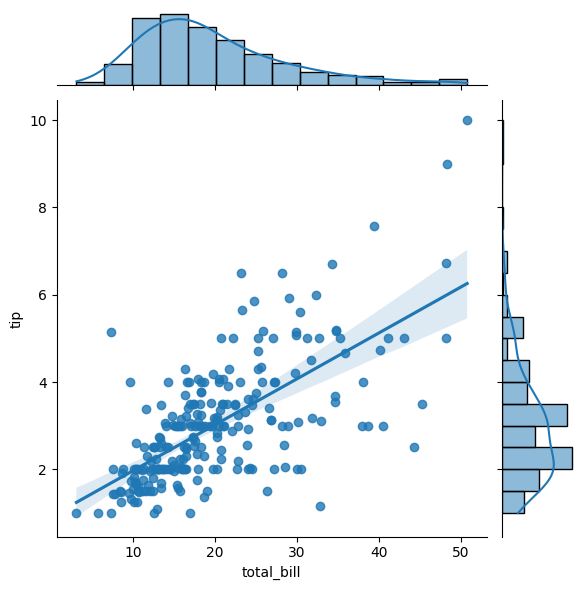

In [16]:
sns.jointplot(data=df, x= 'total_bill', y='tip', kind= 'reg')

8. Write a python function to calculate the probability density function of a continuous random variable for a random normal distribution.

[0.20262569 0.1407702  0.28778576 0.26389073 0.43404523 0.09470056
 0.33124397 0.20915603 0.28764521 0.43362647 0.4185004  0.38781704
 0.37165364 0.24927962 0.34804692 0.3133313  0.1378541  0.32518375
 0.39747128 0.43419419 0.31081042 0.00963397 0.16626443 0.41452096
 0.33123495 0.42492625 0.22417315 0.36491038 0.25764675 0.28303301
 0.30326714 0.4066091  0.42477283 0.38014344 0.32792549 0.34337725
 0.1141161  0.04497953 0.16362016 0.41827476 0.1077753  0.34241177
 0.4334969  0.36449276 0.33375709 0.425518   0.41110167 0.40249649
 0.36398453 0.38012207 0.19858556 0.39626234 0.27207961 0.43405904
 0.4339365  0.37751536 0.0386387  0.42490261 0.38421155 0.43398516
 0.43352389 0.34553136 0.09912553 0.3777034  0.32254449 0.42159004
 0.42936173 0.06814255 0.38417777 0.17514836 0.43339022 0.43420023
 0.21530572 0.37100993 0.08302146 0.41168264 0.43295563 0.42621648
 0.15604027 0.35319869 0.07043109 0.02976018 0.08929714 0.19412813
 0.30583559 0.36343535 0.14417073 0.41987197 0.36685228 0.3239

C:\Users\supri\AppData\Local\Temp\ipykernel_3380\558801050.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prob_den_func(nd), shade=True)


<Axes: ylabel='Density'>

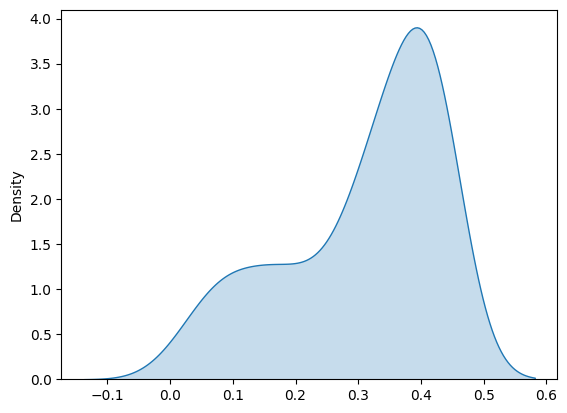

In [7]:
def prob_den_func(x):
    m = np.mean(x)
    std = np.std(x)
    return scs.norm.pdf(x, m, std)
nd = np.random.randn(100)
print(prob_den_func(nd))
sns.kdeplot(prob_den_func(nd), shade=True)

9. Create a program to calculate the cumulative density function(CDF) of an exponential distribution.

[ 0.          0.          0.09329664  0.09329664  0.45153299  0.45153299
  0.66268318  0.66268318  0.66268318  0.90349731  0.90349731  0.90349731
  0.90349731  0.90349731  1.12928681  1.12928681  1.12928681  1.13768911
  1.48040793  1.48040793  1.48040793  1.48040793  1.48040793  1.48040793
  1.48040793  1.48040793  1.48040793  1.48040793  1.48040793  1.88326288
  2.26707864  2.26707864  2.50537388  3.06379679  3.06379679  3.06379679
  3.06379679  3.06379679  3.06379679  3.06379679  3.06379679  3.08323048
  3.08901666  3.08901666  3.50360111  3.58758841  4.14554313  4.14554313
  4.23468926  4.23468926  4.61344949  4.61344949  5.07583586  5.07583586
  5.07583586  5.07583586  5.07583586  5.48674239  5.48674239  5.48674239
  5.74199054  5.74199054  5.74199054  5.74199054  5.74199054  6.11467577
  6.11467577  6.11467577  6.4195571   6.4195571   6.83939644  7.07537074
  7.20382353  7.20382353  7.20382353  7.20382353  7.43831176  7.43831176
  7.71032347  7.71032347  8.17280795  8.4403049   8

C:\Users\supri\AppData\Local\Temp\ipykernel_3380\481266042.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cdf, shade=True)


<Axes: ylabel='Density'>

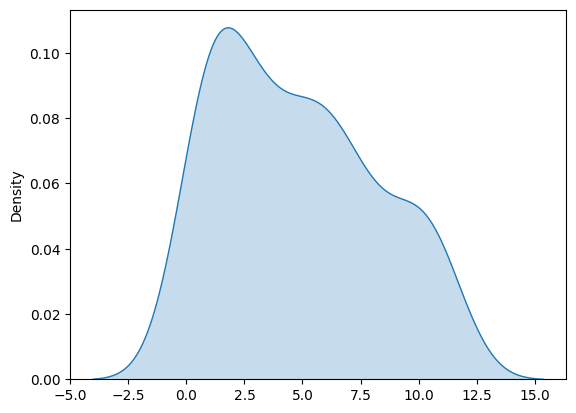

In [12]:
ed = np.random.exponential(scale=2, size=(100))
m = np.mean(ed)
std = np.std(ed)
pdf = scs.expon.pdf(ed, m, std)
cdf = np.cumsum(pdf)
print(cdf)
sns.kdeplot(cdf, shade=True)

10. Write a python function to calculate the Probability Mass Function(PMF) of a poisson distribution.

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.06115362e-09 0.00000000e+00 4.12230724e-08 0.00000000e+00
 4.12230724e-07 0.00000000e+00 2.74820483e-06 0.00000000e+00
 1.37410241e-05 0.00000000e+00 5.49640966e-05 0.00000000e+00
 1.83213655e-04 0.00000000e+00 5.23467587e-04 0.00000000e+00
 1.30866897e-03 0.00000000e+00 2.90815326e-03 0.00000000e+00
 5.81630652e-03 0.00000000e+00 1.05751028e-02 0.00000000e+00
 1.76251713e-02 0.00000000e+00 2.71156481e-02 0.00000000e+00
 3.87366401e-02 0.00000000e+00 5.16488535e-02 0.00000000e+00
 6.45610669e-02 0.00000000e+00 7.59541964e-02 0.00000000e+00
 8.43935515e-02 0.00000000e+00 8.88353174e-02 0.00000000e+00
 8.88353174e-02 0.00000000e+00 8.46050642e-02 0.00000000e+00
 7.69136947e-02 0.00000000e+00 6.68814737e-02 0.00000000e+00
 5.57345614e-02 0.00000000e+00 4.45876491e-02 0.00000000e+00
 3.42981916e-02 0.00000000e+00 2.54060679e-02 0.00000000e+00
 1.81471913e-02 0.00000000e+00 1.25153044e-02 0.00000000e+00
 8.34353625e-03 0.000000

C:\Users\supri\AppData\Local\Temp\ipykernel_3380\3704150629.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prob_mass_func(x1), shade=True)


<Axes: ylabel='Density'>

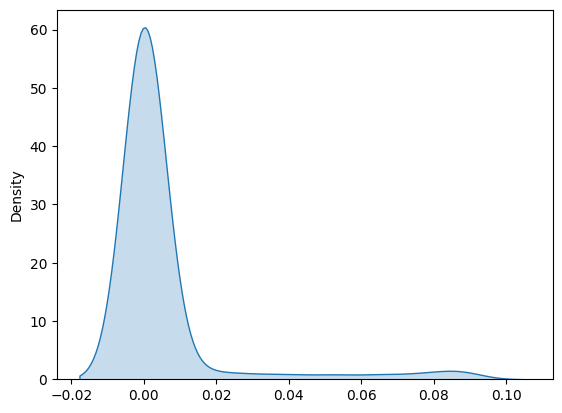

In [19]:
def prob_mass_func(x):
    return scs.poisson.pmf(x, 20, 2)
x1 = np.arange(0, 100, 0.5)
print(prob_mass_func(x1))
sns.kdeplot(prob_mass_func(x1), shade=True)

In [16]:
np.random.rand(100)

array([9.04543910e-01, 2.43546937e-01, 6.47347126e-02, 2.24963309e-01,
       5.20428317e-01, 3.66483480e-02, 8.84867404e-01, 2.35803923e-01,
       6.99221367e-02, 3.22055818e-01, 4.47984607e-01, 5.01971138e-01,
       1.30126717e-01, 3.23449200e-01, 5.05020167e-01, 6.95297447e-02,
       4.34989987e-01, 9.93397731e-03, 4.42485785e-01, 5.56994790e-02,
       2.51447911e-01, 6.81192984e-01, 3.89344112e-01, 2.94781781e-01,
       7.46578500e-01, 2.13328608e-01, 5.76785947e-01, 9.41149206e-02,
       4.15250519e-01, 9.82256250e-02, 6.89436587e-04, 3.86692750e-01,
       4.10366033e-02, 3.28324953e-01, 5.38445144e-02, 6.77340253e-01,
       2.48902128e-01, 3.82932320e-01, 5.85420463e-01, 2.23821845e-01,
       7.87443488e-01, 5.30843376e-02, 9.18904363e-01, 5.31527307e-01,
       3.69502436e-01, 7.34542179e-01, 1.87133354e-01, 3.56171489e-02,
       1.86658952e-01, 5.67274032e-01, 2.20056900e-01, 9.20927718e-02,
       2.09705774e-01, 6.56850672e-01, 1.43228106e-01, 6.72116006e-01,
      

In [2]:
from statsmodels.stats.weightstats import ztest

11. A company wants to test a new website layout leads to a higher conversion rates(Percentage of visitors who make a purchase). They collect data from old and new layouts to compare.

To generate the data use the following commands:

Apply z test to find out which test is successful.

In [11]:
import numpy as np
# 50 purchases of 1000 visitors
old_layout = np.array([1] * 50 + [0] * 950)
# 70 purchases of 1000 visitors
new_layout = np.array([1] * 70 + [0] * 930)

In [12]:
p = (len(old_layout[old_layout == 1]) + len(new_layout[new_layout == 1])) / (len(old_layout) + len(new_layout))
p_ol = len(old_layout[old_layout == 1]) / len(old_layout)
p_nl = len(new_layout[new_layout == 1]) / len(new_layout)
z = (p_nl - p_ol)/np.sqrt(p * (1-p)*((1/len(new_layout))+(1/len(new_layout))))
p_val = scs.norm.sf(abs(z))
if z <= 1.65:
    print("Both layouts are equally effective.")
else:
    print("New layout is better to implement.")

New layout is better to implement.


12. A tutoring service claims that it's program improves student's exam score. A sample of students who participated in the program was taken and their scores before and after the program was recorded. 

Use z tests made by tutors are true false.

In [19]:
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

In [39]:
v1 = np.mean(before_program)
v2 = np.mean(after_program)
z_test = ztest(before_program, after_program, value = v2 - v1)
zscore = z_test[0]
p_val = z_test[1]
if zscore > 1.65:
    print("Tutor's claim is True.")
else:
    print("Tutor's claim is False.")

Tutor's claim is False.


13. A phermacutical company wants to determine if a new drug is effective in reducing blood pressure. They conduct a study to measure blood pressure measurements before and after administering the drug.
implement ztest to find the drug really works or not.

In [48]:
before_drug = np.array([145, 150, 135, 140, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

In [52]:
v1 = np.mean(before_drug)
v2 = np.mean(after_drug)
z_test = ztest(before_drug, after_drug, value= v2 - v1)
zscore = z_test[0]
p_val = z_test[1]
if zscore < 1.65:
    print("No effect of drug")
else:
    print("Drug is working.")

Drug is working.


14. A customer service department claims that their average response time is less than 5 min. A sample of recent customer interactions was taken, and the response times were recored.

Implement z test to find the claims made by customer service department are true or false.

In [53]:
response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])

In [54]:
z_test = ztest(response_times, value=5)
zscore = z_test[0]
p_val = z_test[1]
if zscore < -1.65:
    print("Claims are true.")
else:
    print("Claims are not true.")

Claims are true.


15. A company is testing two different test layouts to see which one leads to higher click through rates. Write a python function to perform an A/B test analysis including calculating the t-statistic, degree of freedom and p-value.

In [8]:
layout_a_click = np.array([28, 32, 33, 29, 31, 34, 30, 35, 36, 37])
layout_b_click = np.array([40, 41, 38, 42, 39, 44, 43, 41, 45, 47])

In [9]:
def t_test(x1, x2):
    import numpy as np
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    d1 = np.std(x1)
    d2 = np.std(x2)
    dof1 = len(x1) - 1
    dof2 = len(x2) - 1
    sd = np.sqrt((dof1 * (d1 ** 2) + dof2 * (d2 ** 2))/(dof1 + dof2))
    t_score = (m1 - m2)/(sd * np.sqrt(1/len(x1) + len(x2)))
    if np.abs(t_score) > 2.101:
        print("There is difference observed.")
    else:
        print("No difference in samples.")
    print(t_score)
t_test(layout_a_click, layout_b_click)
    

No difference in samples.
-1.0825376116197238


16. A pharmacutical company wants to determine if a new drug is more effective than an existing drug in reducing cholesterol levels. Create a program to analize the clinical trial data and calculate the t-statistic and p-value for the treatment effect.

In [2]:
existing_drug_levels = np.array([180, 182, 175, 185, 178, 176, 172, 184, 179, 183])
new_drug_levels = np.array([170, 172, 165, 168, 175, 173, 170, 178, 172, 176])

In [4]:
t_score, p_val = scs.ttest_ind(existing_drug_levels, new_drug_levels)
df = len(existing_drug_levels) + len(new_drug_levels) - 2
alp = 0.05
t_cv = scs.t.ppf(1-alp, df)
print("T-score:", t_score)
print("P-Value:", p_val)
print("Critical t-score:", t_cv)
if np.abs(t_score) >t_cv:
    print('The new drug is effective.')
else:
    print('No such difference observed.')
 

T-score: 4.14048098620866
P-Value: 0.0006143398442372505
Critical t-score: 1.7340636066175354
The new drug is effective.


17. A school district introduces an educational intervension program to improve math scores. Write a python function to analyze pre and post intervension test scores to determine t-statistics and p-value to determine if the intervension had a significant impact.

In [5]:
pre_intervension_score = np.array([80, 85, 90, 75, 88, 82, 92, 78, 85, 87])
post_intervension_score = np.array([90, 92, 88, 92, 95, 91, 96, 93, 89, 93])

In [6]:
t_score, p_val = scs.ttest_ind(pre_intervension_score, post_intervension_score)
df = len(pre_intervension_score) + len(post_intervension_score) - 2
alp = 0.05
t_cv = scs.t.ppf(1-alp, df)
print("T-score:", t_score)
print("P-Value:", p_val)
print("Critical t-score:", t_cv)
if np.abs(t_score) >t_cv:
    print('The intervension had a significant impact.')
else:
    print('No such difference observed.')

T-score: -4.080355128162116
P-Value: 0.0007022570725706455
Critical t-score: 1.7340636066175354
The intervension had a significant impact.


18. An HR department wants to investigate if there is a gender based salary gap within the company. Develop a program to analize the salary data, calculate the t-statistic and determine if there is a statistically significant average salary gap between male and female employees.

In [4]:
np.random.seed(0)
male_salaries = np.random.normal(loc= 50000, scale= 10000, size= 20)
female_salaries = np.random.normal(loc= 55000, scale= 9000, size= 20)

In [5]:
t_score, p_val = scs.ttest_ind(male_salaries, female_salaries)
df = len(male_salaries) + len(female_salaries) - 2
alp = 0.05
t_cv = scs.t.ppf(1-alp/2, df)
print("T-score:", t_score)
print("P-Value:", p_val)
print("Critical t-score:", t_cv)
if np.abs(t_score) >t_cv:
    print('There is a significant gap between average salaries of male and female employees.')
else:
    print('No such difference in average salaries of employees.')

T-score: 0.06114208969631383
P-Value: 0.9515665020676465
Critical t-score: 2.024394163911969
No such difference in average salaries of employees.


19. A manufacturer produces two different versions of a product and wants to compare their quality score. Create apython function to analyze quality assesment data, calculate t-statistics and decide whether there is a significant quality difference between quality of two versions.

In [6]:
version1_scores = np.array([85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85])
version2_scores = np.array([80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82])

In [7]:
t_score, p_val = scs.ttest_ind(version1_scores, version2_scores)
df = len(version1_scores) + len(version2_scores) - 2
alp = 0.05
t_cv = scs.t.ppf(1-alp/2, df)
print("T-score:", t_score)
print("P-Value:", p_val)
print("Critical t-score:", t_cv)
if np.abs(t_score) >t_cv:
    print('There is a significant quality difference.')
else:
    print('No such quality difference observed.')

T-score: 10.825470526334266
P-Value: 4.089751290602056e-14
Critical t-score: 2.014103388880846
There is a significant quality difference.


20. A restaurent chain collects customer satisfection scores from two different branches. Write a program to analize the scores, calculate t-statistics and determine if there is statistically significant difference of customer satisfection between two branches.

In [8]:
branch_a_scores = np.array([4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4])
branch_b_scores = np.array([3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3])

In [9]:
t_score, p_val = scs.ttest_ind(branch_a_scores, branch_b_scores)
df = len(branch_a_scores) + len(branch_b_scores) - 2
alp = 0.05
t_cv = scs.t.ppf(1-alp/2, df)
print("T-score:", t_score)
print("P-Value:", p_val)
print("Critical t-score:", t_cv)
if np.abs(t_score) >t_cv:
    print('There is a significant difference between customer satisfection scores.')
else:
    print('No such customer satisfection difference observed.')

T-score: 5.480077554195743
P-Value: 8.895290509945657e-07
Critical t-score: 2.00029782201426
There is a significant difference between customer satisfection scores.


21. A political analyst wants to determine if there is a significant association between age groups and voter performances (Candidate A or Candidate B). They collect sample from 500 voters and classify them into different age groups and candidate performances. Perform a chi-square test to determine if there is a significant association between age group and voter performances.

In [10]:
np.random.seed(0)
age_groups = np.random.choice(['18-30', '31-50', '51+'], size=30)
voter_performances = np.random.choice(['Candidate A', 'Candidate B'], size=30)

In [11]:
data = pd.crosstab(age_groups, voter_performances)
stat, p, dof, expected = scs.chi2_contingency(data)
alpha = 0.05
print("p value: ", p)
if p <= alpha:
    print('There is a significant association between age group and voter performances.')
else:
    print('age group and voter performance does not associate.')

p value:  0.48671161971286614
age group and voter performance does not associate.


22. A company conducted a customer satisfection survey to determine if there is a significant relationship between product satisfection levels(Satisfied, Neutral, Dissatisfied) and region wise customers are located(East, West, North, South). The survey data is summerised in a contengency table. Conduct a Chi Square test to determine if there is a significant relationship between customer satisfection level and customer region.

In [3]:
data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])

In [4]:
stat, p, dof, expected = scs.chi2_contingency(data)
alpha = 0.05
print("p value: ", p)
if p <= alpha:
    print('There is a significant relationship between customer satisfection level and customer region.')
else:
    print('customer satisfection level and customer region does not relate.')

p value:  0.00010349448486004387
There is a significant relationship between customer satisfection level and customer region.


23. A company implemented an employee training programme to improve job performance(Effective, Neutral, Ineffective). After the training they collected data from a sample of employees and classified them based on their job performance before and after the training. Perform a chi square test to determine if there is a significant difference between job performance levels before and after the training.

In [6]:
data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]])

In [7]:
stat, p, dof, expected = scs.chi2_contingency(data)
alpha = 0.05
print("p value: ", p)
if p <= alpha:
    print('There is a significant difference between job performance levels before and after the training.')
else:
    print('No significant difference between job performance levels before and after the training.')

p value:  0.00018609719479882554
There is a significant difference between job performance levels before and after the training.


24. A company produces three different versions of a product: Standard, Premium and Deluxe. Company wants to determine if there is a significant difference in customer satisfection scores among the three product versions. They conducted a survey and collected customer satisfection scores for each version from a random sample of customers. Conduct a ANOVA test to determine if there is a significant difference in customer satisfection scores.

In [9]:
standard_scores = np.array([80, 85, 90, 78, 88, 82, 92, 78, 85, 87])
premium_scores = np.array([90, 92, 88, 92, 95, 91, 96, 93, 89, 93])
deluxe_scores = np.array([95, 98, 92, 97, 96, 94, 98, 97, 92, 99])

In [11]:
stat, p_val = scs.f_oneway(standard_scores, premium_scores, deluxe_scores)
alpha = 0.05
print("P value: ", p_val)
if p_val <= alpha:
    print('There is a significant difference in customer satisfection scores.')
else:
    print('There is no significant difference in customer satisfection scores.')

P value:  3.578632885734896e-07
There is a significant difference in customer satisfection scores.
